<a href="https://colab.research.google.com/github/hajarnabil/egfwd/blob/main/Copy_of_Clustering_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini-Project 3 - Clustering

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Hajar Nabil El-Sherbeny

ID: 46-20359

Tutorial: T-01

---

Name: Mayar Hossam El-din Galal

ID: 46-15920

Tutorial: T-01

---


## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

**Note**: the data URL is `https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv`

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2021/main/data/music_genres.csv')
df.head(10)

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   
5     1                abstract      0.459210      0.516167  3.431965e+05   
6     1          abstract beats      0.342147      0.623000  2.299362e+05   
7     1        abstract hip hop      0.243854      0.694571  2.318492e+05   
8     0               accordeon      0.323000      0.588000  1.640000e+05   
9     1               accordion      0.446125      0.624812  1.670616e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   
5  0.442417          0.849667  0.118067 -15.472083     0.046517  127.885750   
6  0.527800          0.333603  0.099653  -7.918000     0.116373  112.413800   
7  0.646235          0.024231  0.168543  -7.349328     0.214258  108.244987   
8  0.392000          0.441000  0.079400 -14.899000     0.072700  109.131000   
9  0.373437          0.193738  0.160300 -14.487063     0.078538  112.872438   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7  
5  0.307325   43.500000    1  
6  0.493507   58.933333   10  
7  0.571391   39.790702    2  
8  0.709000   39.000000    2  
9  0.658688   21.937500    2

## Data Inspection/Cleaning

In [ ]:
df.dtypes

mode                  int64
genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [ ]:
df.isnull().any().any()
#there is no null values

False

In [ ]:
df.describe()

mode  acousticness  danceability   duration_ms       energy  \
count  2973.000000   2973.000000   2973.000000  2.973000e+03  2973.000000   
mean      0.833165      0.401241      0.537187  2.517209e+05     0.561143   
std       0.372891      0.319760      0.150668  9.465686e+04     0.234486   
min       0.000000      0.000003      0.056900  3.094600e+04     0.001002   
25%       1.000000      0.119050      0.441202  2.063788e+05     0.395058   
50%       1.000000      0.321745      0.546496  2.375453e+05     0.601195   
75%       1.000000      0.673991      0.647500  2.772720e+05     0.730127   
max       1.000000      0.996000      0.929000  2.382587e+06     0.994667   

       instrumentalness     liveness     loudness  speechiness        tempo  \
count       2973.000000  2973.000000  2973.000000  2973.000000  2973.000000   
mean           0.211366     0.192800   -10.509848     0.083588   119.018723   
std            0.267329     0.092356     5.369202     0.080483    17.469188   
min            0.000000     0.022200   -41.825000     0.023800    47.135722   
25%            0.004835     0.137687   -12.427656     0.044900   109.198143   
50%            0.080700     0.178764    -9.221817     0.059457   119.194167   
75%            0.343333     0.220856    -6.920125     0.091000   127.508750   
max            0.992000     0.960000     0.060000     0.946219   204.212000   

           valence   popularity          key  
count  2973.000000  2973.000000  2973.000000  
mean      0.492748    39.919185     5.938782  
std       0.201820    16.748723     3.368110  
min       0.003353     0.000000     0.000000  
25%       0.348578    32.491279     3.000000  
50%       0.500048    43.056569     7.000000  
75%       0.640257    51.138889     9.000000  
max       0.980000    80.666667    11.000000

## 1. What are the 20 most danceable music genres?

In [ ]:
a= df[['genres', 'danceability']].copy()
data_a= a.sort_values(by='danceability', ascending=False).head(20)
data_a
#This is to sort the genres in order to demonstrate the 20 most danceable music genres

genres  danceability
1012        experimental house      0.929000
1238                guam indie      0.920000
917              dutch hip hop      0.911000
924              dutch rap pop      0.907400
364   british children's music      0.906000
1358          indie deutschrap      0.903000
2743           trance mexicano      0.902000
1072                  footwork      0.897000
1119             funk paulista      0.896000
2244                 proto-rap      0.893000
2684            tamaulipas rap      0.892000
756             danish hip hop      0.891000
46             alberta hip hop      0.885000
2449        serbian electronic      0.883000
693        corridos cristianos      0.881000
2755           trap venezolano      0.877000
140      atmospheric post-rock      0.869000
2969                   zouglou      0.863000
1769                miami bass      0.860289
734         cumbia santafesina      0.860000

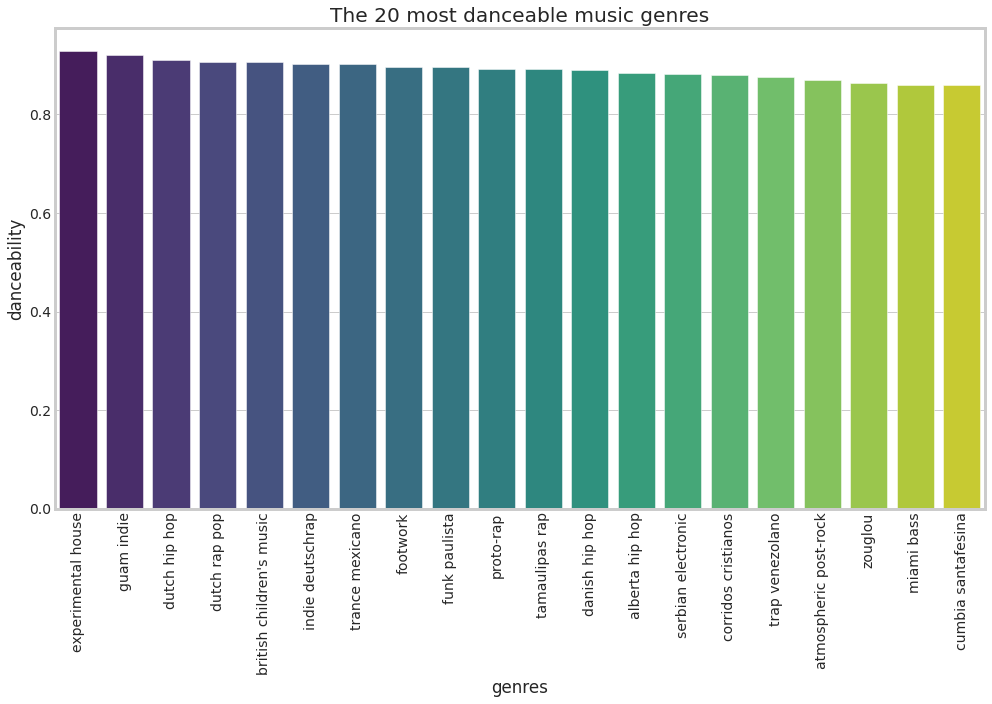

In [ ]:
f = plt.figure(figsize=(14,10))
sns.barplot(x='genres', y='danceability',palette='viridis',data= data_a).set(title='The 20 most danceable music genres')
plt.xticks(rotation=90)
plt.tight_layout()
#This is to demonstrate the top 20 genres in a barplot

**Answer:** 

Experimental House,Guam Indie,Dutch Hip Hop,Dutch Rap Pop,British Children's Music,Indie Deutschrap,Trance Mexicano,Footwork,Funk Paulista,Proto-Rap,Tamaulipas Rap,Danish Hip Hop,Alberta Hip Hop,Serbian Electronic,Corridos Cristianos,Trap Venezolano,Atmospheric Post-Rock,Zouglou,Miami Bass,Cumbia Santafesina

## 2. What are the 20 lowest energy music genres?

In [ ]:
b= df[['genres', 'energy']].copy()
data_b= b.sort_values(by='energy', ascending=False).tail(20)
data_b
#This is to demonstrate the 20 lowest energy music genres

genres    energy
1325  hungarian contemporary classical  0.025200
72     american 21st century classical  0.023950
678                 contemporary choir  0.023950
2913                        warm drone  0.023600
1184              ghanaian traditional  0.022400
152                   australian choir  0.021800
327                        boy soprano  0.021500
210                   baltic classical  0.019407
279                              bible  0.016100
207             balkan classical piano  0.012015
912              dutch classical piano  0.011550
150                 australian ambient  0.008900
473          caucasian classical piano  0.008877
1895         native american spiritual  0.008390
1441          italian classical guitar  0.005490
1723                          medieval  0.004440
2476                      singing bowl  0.004130
1611            korean classical piano  0.003950
283                           binaural  0.001002
328                        brain waves  0.001002

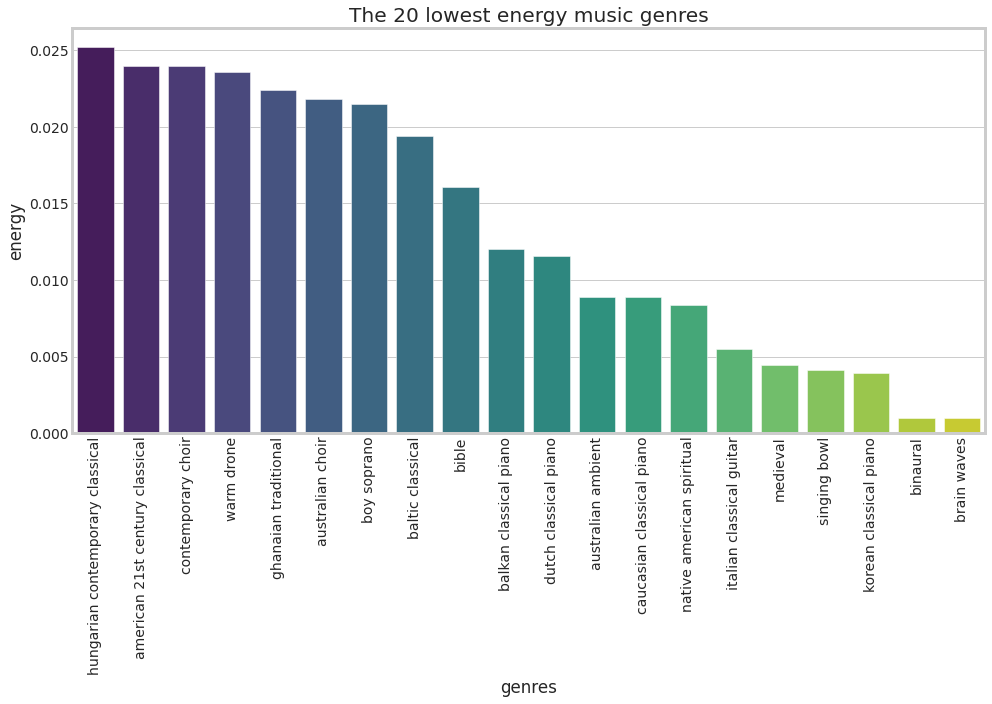

In [ ]:
f = plt.figure(figsize=(14,10))
sns.barplot(x='genres', y='energy',palette='viridis',data= data_b).set(title='The 20 lowest energy music genres')
plt.xticks(rotation=90)
plt.tight_layout()
#This is to represent the lowest 20 in a barplot

**Answer**: 

Hungarian Contemporary  Classical, American 21st Classsical ,Contemporary Choir, Warm Drone, Ghanaian Traditional, Australian Choir, Boy Soprano, Baltic Classical, Bible, Balkan Classical Piano, dutch Classical Piano, Australian Ambient, Caucasian Classical Piano, Native American Spirtual,Italian Classical Guitar, Medieval,Singing bowl, Korean Classical Piano, Binaural, Brain Waves



## 3. What are the 20 music genres most commonly performed live?

In [ ]:
c= df[['genres', 'liveness']].copy()
data_c= c.sort_values(by='liveness', ascending=False).head(20)
data_c
#Using sorting method to demonstrate the 20 most performed live genres

genres  liveness
1826            modular synth  0.960000
1246           gujarati garba  0.883000
2743          trance mexicano  0.880000
1784              mindfulness  0.864250
284                  birdsong  0.799833
1931               new comedy  0.749700
797               deep comedy  0.721750
185                  autoharp  0.719000
656              clean comedy  0.711513
141        atmospheric sludge  0.706000
139    atmospheric post-metal  0.706000
920                dutch jazz  0.706000
1864         musica paraibana  0.704000
1410              irish banjo  0.693333
2924  west australian hip hop  0.687000
1223              greek house  0.670000
2079       organic electronic  0.670000
1469               j-acoustic  0.669000
597     classic icelandic pop  0.665000
2785             turkish trap  0.649933

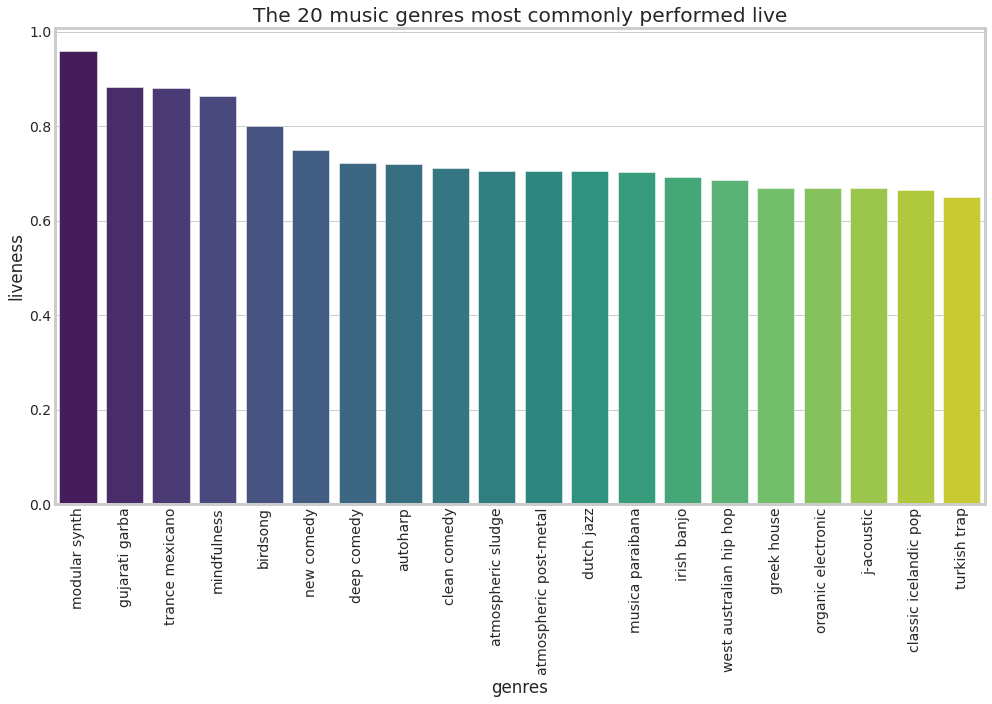

In [ ]:
f = plt.figure(figsize=(14,10))
sns.barplot(x='genres', y='liveness',palette= 'viridis',data= data_c).set(title='The 20 music genres most commonly performed live')
plt.xticks(rotation=90)
plt.tight_layout()
#To show the 20 live genres using barplot

**Answer**

Modular Synth, Gujarati Garba, Trance Mexicano, Mindfulness, Birdsong, New Comedy, Deep Comedy, Autoharp, Clean Comedy, Atmospheric Sludge, Atmospheric Post-Metal, Dutch Jazz, Musica Paraibana, Irish Banjo, West Australian Hip Hop, Greek House, Organic Electronic, J-Acoustic, Classic Icelandic Pop, Turkish Trap

## 4. What are the 20 most popular music genres?


In [ ]:
d= df[['genres', 'popularity']].copy()
data_d= d.sort_values(by='popularity', ascending=False).head(20)
data_d
#To sort most popular music genres 

genres  popularity
237              basshall   80.666667
2778          turkish edm   80.000000
2533  south african house   80.000000
2755      trap venezolano   80.000000
46        alberta hip hop   78.500000
536    chinese electropop   78.500000
37              afroswing   77.312500
31              afro soul   77.000000
2383        russian dance   77.000000
1239             guaracha   77.000000
1381         indie triste   77.000000
575               circuit   77.000000
2800          uk diy punk   77.000000
2102        pagode baiano   76.666667
2337        ritmo kombina   76.333333
2754          trap triste   76.083333
2002    norwegian pop rap   76.000000
2834       urbano espanol   75.250000
1850       musica canaria   75.166667
110     argentine hip hop   74.979167

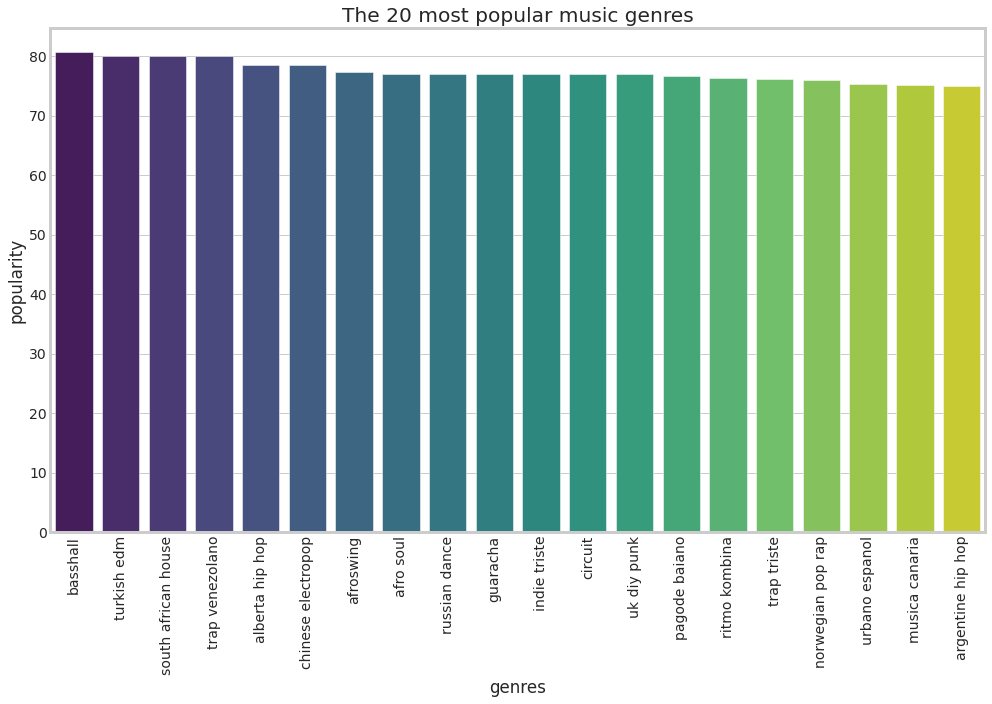

In [ ]:
f = plt.figure(figsize=(14,10))
sns.barplot(x='genres', y='popularity', palette= 'viridis',data= data_d).set(title='The 20 most popular music genres')
plt.xticks(rotation=90)
plt.tight_layout()
#Demonstrating 20 popular music genres in order using barplot

**Answer**

Basshal, Turkish Edm, South African House, Trap Venezolano, Alberta Hip Hop, Chinese Electropop, Afroswing, Afro Soul, Russian Dance, Quaracha, Indie Triste, Circuit, UK Diy Punk, Pagode Biano, Ritmo Kombina, Trap Triste, Norwegian Pop Rap, Urbano Espanol, Musica Canaria, Argentine Hip Hop

## 5. What are the most correlated attributes with each other?


In [ ]:
correlated = df.corr()
correlated
#Finding the correlation between the attributes

mode  acousticness  danceability  duration_ms    energy  \
mode              1.000000      0.077347     -0.071240    -0.053197 -0.080352   
acousticness      0.077347      1.000000     -0.324991    -0.014075 -0.868274   
danceability     -0.071240     -0.324991      1.000000    -0.160634  0.299780   
duration_ms      -0.053197     -0.014075     -0.160634     1.000000 -0.048158   
energy           -0.080352     -0.868274      0.299780    -0.048158  1.000000   
instrumentalness -0.012662      0.273739     -0.383102     0.229421 -0.324940   
liveness         -0.002650     -0.076570     -0.055147     0.018624  0.168233   
loudness         -0.063706     -0.737276      0.453062    -0.137574  0.848965   
speechiness      -0.059127     -0.086139      0.242052     0.033226  0.119791   
tempo            -0.042931     -0.397713      0.082869    -0.046840  0.430825   
valence          -0.010258     -0.178210      0.652546    -0.257517  0.305166   
popularity       -0.031231     -0.458698      0.217992    -0.071019  0.337795   
key              -0.060109     -0.078815      0.029551    -0.029309  0.097165   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
mode                     -0.012662 -0.002650 -0.063706    -0.059127 -0.042931   
acousticness              0.273739 -0.076570 -0.737276    -0.086139 -0.397713   
danceability             -0.383102 -0.055147  0.453062     0.242052  0.082869   
duration_ms               0.229421  0.018624 -0.137574     0.033226 -0.046840   
energy                   -0.324940  0.168233  0.848965     0.119791  0.430825   
instrumentalness          1.000000 -0.050615 -0.537669    -0.196763 -0.201663   
liveness                 -0.050615  1.000000  0.123946     0.190136  0.002285   
loudness                 -0.537669  0.123946  1.000000     0.095298  0.407985   
speechiness              -0.196763  0.190136  0.095298     1.000000  0.001446   
tempo                    -0.201663  0.002285  0.407985     0.001446  1.000000   
valence                  -0.424091  0.000730  0.376577     0.092680  0.139589   
popularity               -0.265449 -0.094178  0.344361    -0.045217  0.146717   
key                      -0.069317  0.007308  0.082991     0.022326  0.081608   

                   valence  popularity       key  
mode             -0.010258   -0.031231 -0.060109  
acousticness     -0.178210   -0.458698 -0.078815  
danceability      0.652546    0.217992  0.029551  
duration_ms      -0.257517   -0.071019 -0.029309  
energy            0.305166    0.337795  0.097165  
instrumentalness -0.424091   -0.265449 -0.069317  
liveness          0.000730   -0.094178  0.007308  
loudness          0.376577    0.344361  0.082991  
speechiness       0.092680   -0.045217  0.022326  
tempo             0.139589    0.146717  0.081608  
valence           1.000000    0.023072  0.063637  
popularity        0.023072    1.000000  0.008577  
key               0.063637    0.008577  1.000000

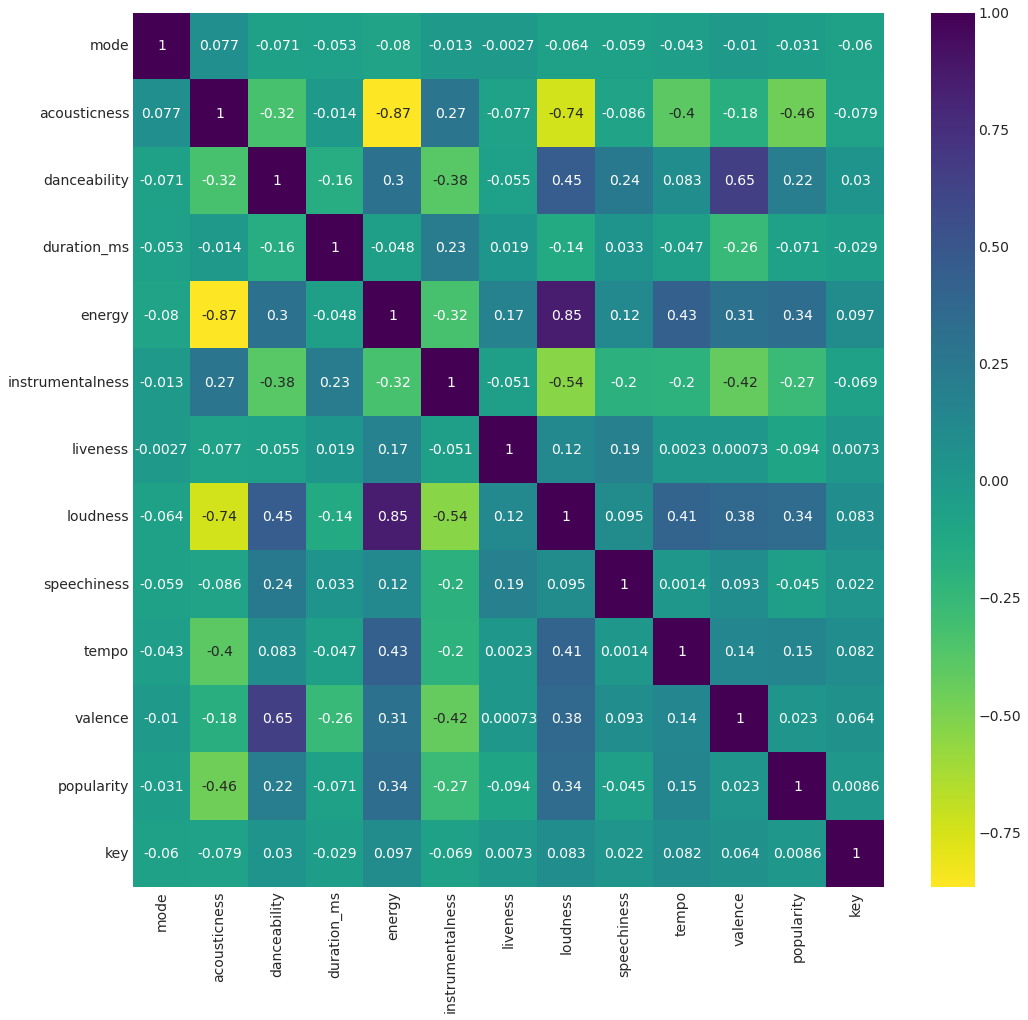

In [ ]:
f = plt.figure(figsize=(15,15))
sns.heatmap(correlated, cmap='viridis_r', annot=True);
#Demonstrating the correlation between the attributes using a heatmap

**Answer:**

1.Energy and Loudness are the most correlated attributes (0.85)

2.Danceability and Valence are the second correlated attribute (0.65)

3.Danceability and Loudness are the third correlated attribute (0.45)

4.Energy and Tempo (0.43)

5.Loudness and Tempo (0.41)

6.Loudness and Valence(0.38)

7.Loudness and Popularity (0.34)

8.Energy and Valence (0.31)

# **BONUS:**

## 6. Plot the words frequency in genres. What are the main genres that appear the most? (mention 3) (Bonus)


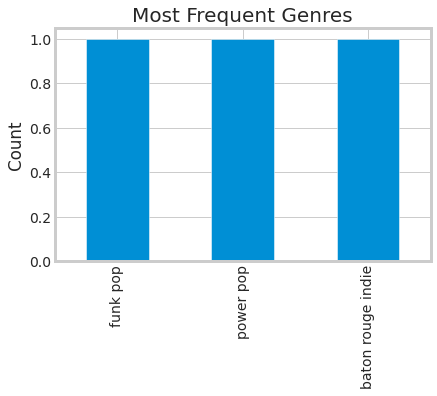

In [ ]:
ax = df['genres'].value_counts()[:3].plot(kind='bar')
ax.set_title('Most Frequent Genres', size=20)
ax.set_ylabel('Count');
#To demonstrate the most frequent genres using their frequencies

**Answer**

Korean Indie Rock, Jawaiian and Mollywood


In [ ]:
df = df.drop('genres', axis=1)
df.info()
#Dropping genre since it is not numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   acousticness      2973 non-null   float64
 2   danceability      2973 non-null   float64
 3   duration_ms       2973 non-null   float64
 4   energy            2973 non-null   float64
 5   instrumentalness  2973 non-null   float64
 6   liveness          2973 non-null   float64
 7   loudness          2973 non-null   float64
 8   speechiness       2973 non-null   float64
 9   tempo             2973 non-null   float64
 10  valence           2973 non-null   float64
 11  popularity        2973 non-null   float64
 12  key               2973 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 302.1 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(df)
scaled_data

array([[ 0.44748433,  1.80819676, -2.48471886, ..., -1.92760907,
        -0.72171978,  0.01817872],
       [ 0.44748433,  0.29257799, -1.57893122, ..., -1.34299618,
         0.7512771 , -0.27877364],
       [ 0.44748433,  1.12840682,  1.16044852, ...,  2.38991988,
         0.4825547 ,  0.31513108],
       ...,
       [ 0.44748433, -0.43158249,  1.40532576, ...,  1.6421528 ,
         0.40293325, -0.27877364],
       [-2.23471511,  1.85094428,  1.11840634, ...,  1.22036371,
        -2.38381762,  0.31513108],
       [ 0.44748433,  0.0619243 ,  0.61218797, ...,  1.56500441,
        -0.57669499,  0.31513108]])

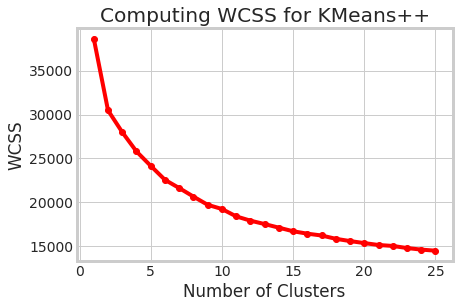

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for k in range( 1, 26 ):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(scaled_data)
    wcss.append( kmeans.inertia_ )
    
plt.plot(range(1, 26), wcss, 'o-r', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()
#The WCSS to figure the elbow of the graph (The number of clusters)

In [ ]:
kmeans = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(scaled_data)
df["cluster"] = cluster_labels

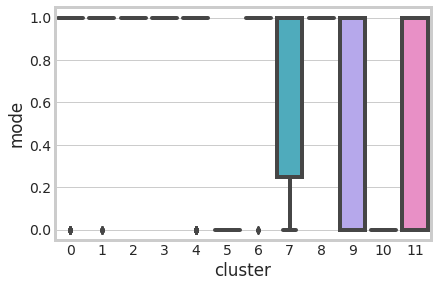

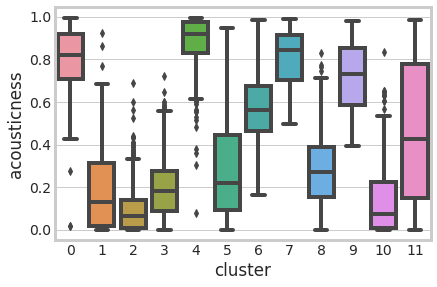

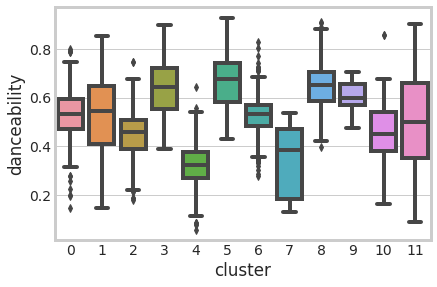

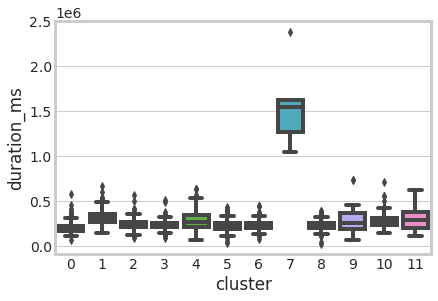

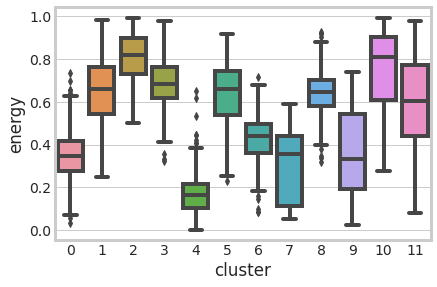

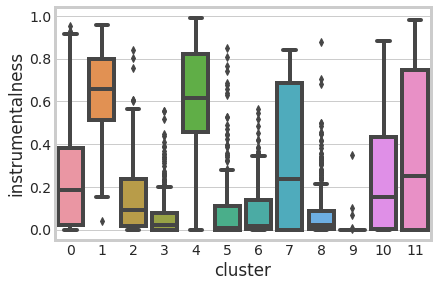

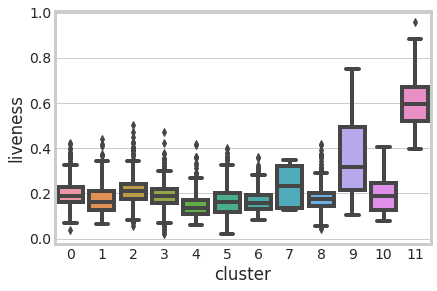

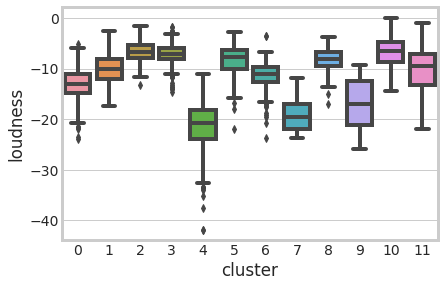

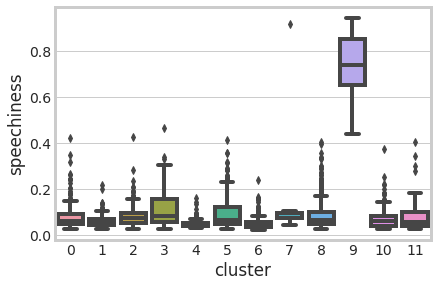

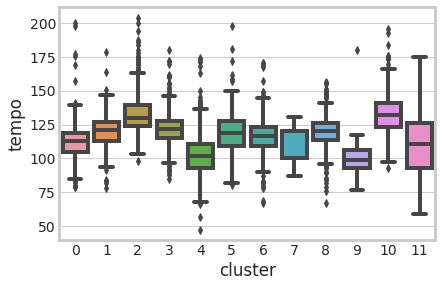

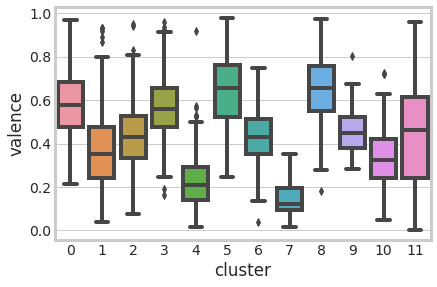

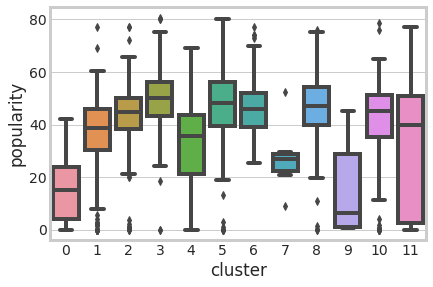

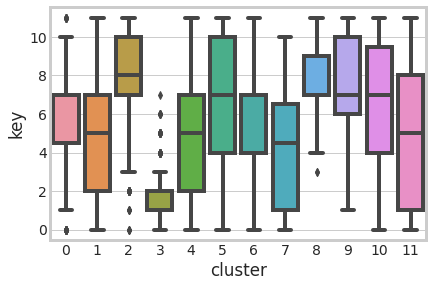

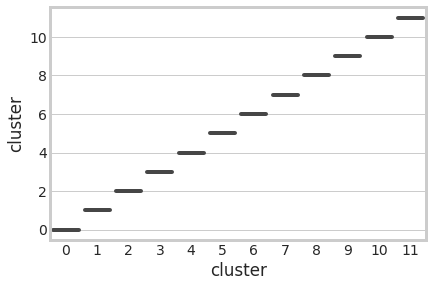

In [ ]:
for col in df.select_dtypes('number').columns:
    plt.figure()
    sns.boxplot(x='cluster', y=col, data=df)

In [ ]:
km = KMeans(n_clusters=12, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)
labels = km.labels_
labels

array([ 0,  8, 11, ..., 10,  7,  0], dtype=int32)

In [ ]:
df['cluster'] = labels
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

mode                                               acousticness  \
         count      mean       std  min   25%  50%  75%  max        count   
cluster                                                                     
0        397.0  0.846348  0.361070  0.0  1.00  1.0  1.0  1.0        397.0   
1        219.0  0.785388  0.411493  0.0  1.00  1.0  1.0  1.0        219.0   
2          3.0  0.666667  0.577350  0.0  0.50  1.0  1.0  1.0          3.0   
3        482.0  0.852697  0.354776  0.0  1.00  1.0  1.0  1.0        482.0   
4         20.0  0.750000  0.444262  0.0  0.75  1.0  1.0  1.0         20.0   
5        717.0  0.863319  0.343750  0.0  1.00  1.0  1.0  1.0        717.0   
6          1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0          1.0   
7        613.0  0.845024  0.362177  0.0  1.00  1.0  1.0  1.0        613.0   
8          2.0  1.000000  0.000000  1.0  1.00  1.0  1.0  1.0          2.0   
9         78.0  0.692308  0.464526  0.0  0.00  1.0  1.0  1.0         78.0   
10       316.0  0.810127  0.392823  0.0  1.00  1.0  1.0  1.0        316.0   
11       125.0  0.736000  0.442573  0.0  0.00  1.0  1.0  1.0        125.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
cluster                                                                         
0        0.526362  0.329971  0.000007  0.216989  0.566875  0.838444  0.995000   
1        0.477464  0.360887  0.000027  0.097354  0.477500  0.850841  0.991786   
2        0.938000  0.043301  0.913000  0.913000  0.913000  0.950500  0.988000   
3        0.317067  0.281971  0.000003  0.096611  0.230418  0.486066  0.994000   
4        0.492085  0.366140  0.000023  0.120000  0.564208  0.827313  0.974000   
5        0.330273  0.275879  0.000005  0.106157  0.259012  0.496875  0.988945   
6        0.681000       NaN  0.681000  0.681000  0.681000  0.681000  0.681000   
7        0.405872  0.299375  0.000096  0.150666  0.338000  0.625052  0.995000   
8        0.633890  0.196731  0.494780  0.564335  0.633890  0.703445  0.773000   
9        0.479338  0.381610  0.000066  0.028432  0.534000  0.891045  0.984583   
10       0.359669  0.329793  0.000003  0.070868  0.239885  0.651505  0.993000   
11       0.602229  0.346675  0.000014  0.330000  0.673000  0.923162  0.996000   

        danceability                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0              397.0  0.545594  0.142817  0.074615  0.458699  0.553027   
1              219.0  0.471260  0.182079  0.123000  0.319151  0.450496   
2                3.0  0.494333  0.036950  0.473000  0.473000  0.473000   
3              482.0  0.542633  0.147358  0.155650  0.442183  0.553715   
4               20.0  0.387947  0.217483  0.056900  0.214000  0.308500   
5              717.0  0.559273  0.131273  0.150270  0.481156  0.554128   
6                1.0  0.130033       NaN  0.130033  0.130033  0.130033   
7              613.0  0.556105  0.131104  0.084700  0.483379  0.564950   
8                2.0  0.222292  0.108953  0.145250  0.183771  0.222292   
9               78.0  0.460588  0.192196  0.185667  0.318792  0.440148   
10             316.0  0.507715  0.157586  0.137000  0.374092  0.508139   
11             125.0  0.541047  0.183328  0.088180  0.421932  0.548000   

                            duration_ms                               \
              75%       max       count          mean            std   
cluster                                                                
0        0.646761  0.847000       397.0  1.772579e+05   11115.696514   
1        0.613791  0.893000       219.0  3.605832e+05   18363.743137   
2        0.505000  0.537000         3.0  1.571094e+06   88171.201060   
3        0.653125  0.897000       482.0  2.690375e+05    9750.803964   
4        0.561000  0.80

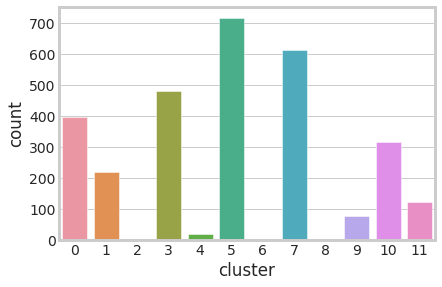

In [ ]:
sns.countplot(x='cluster', data=df)

<Figure size 1080x576 with 0 Axes>

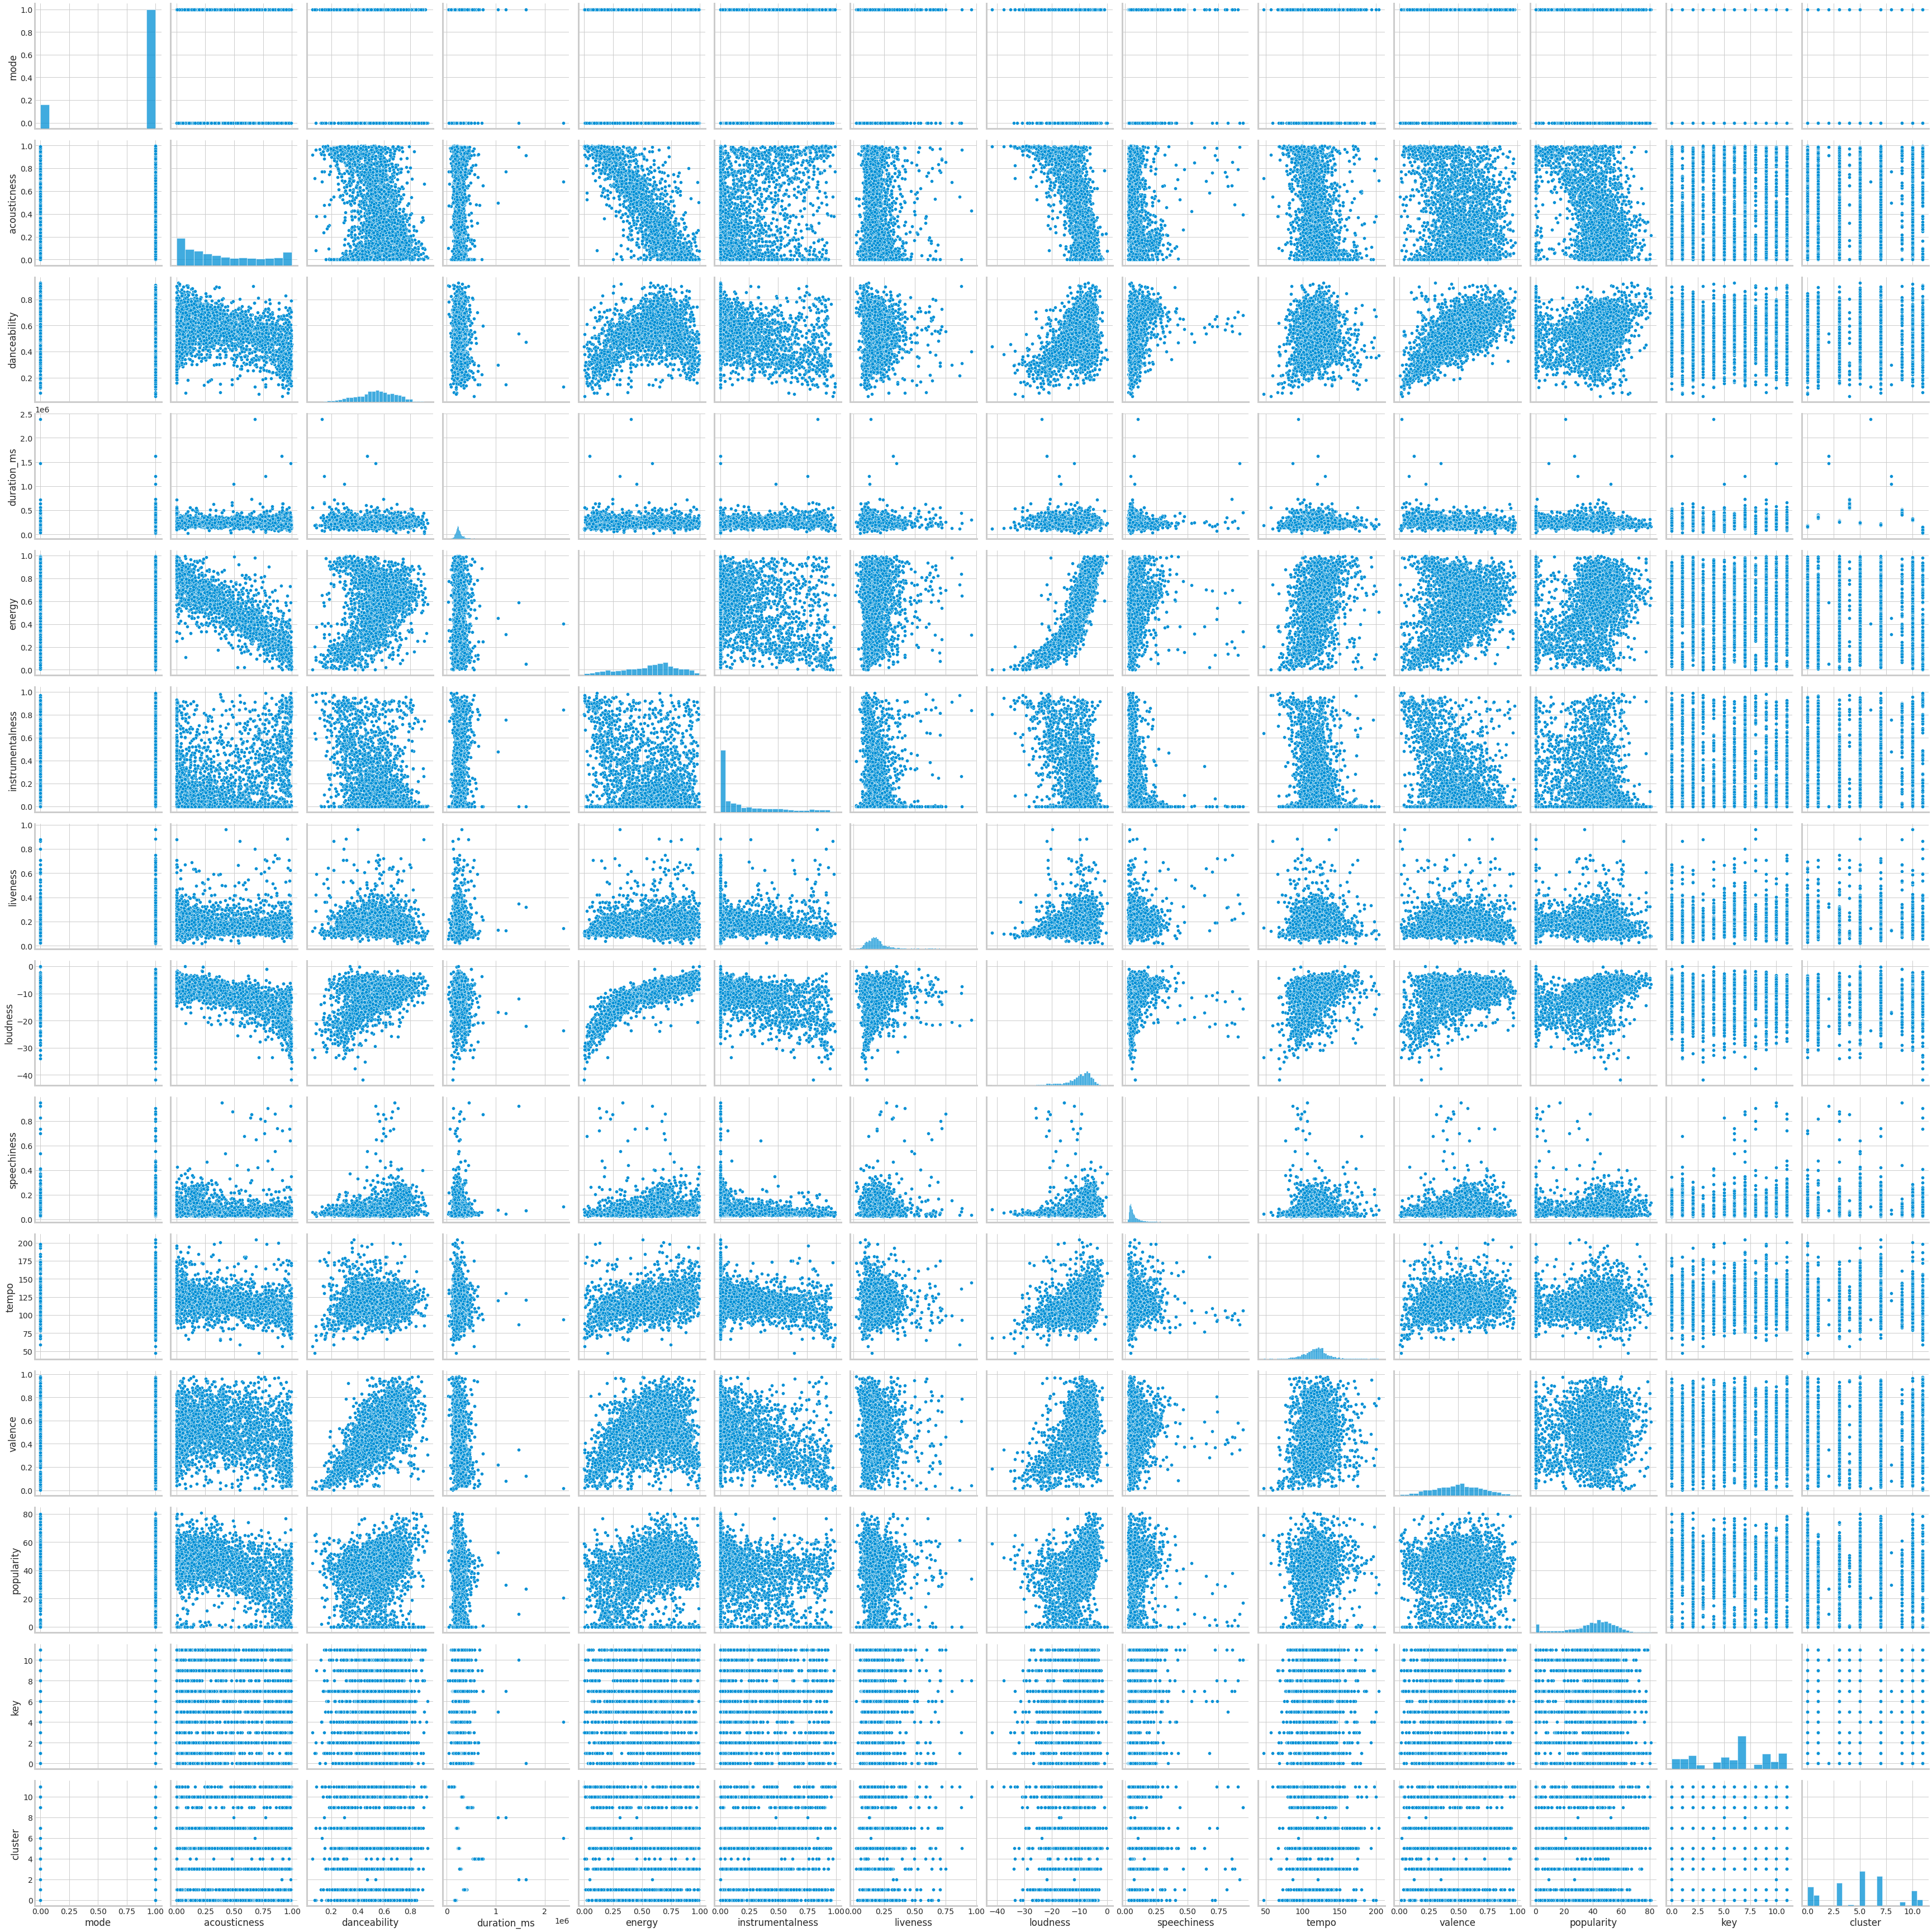

In [ ]:
plt.figure(figsize=(15,8))
sns.pairplot(df, height=3.5);

centroids = km.cluster_centers_
sns.scatterplot(label='centroid', color='black', alpha=0.5, s=100);

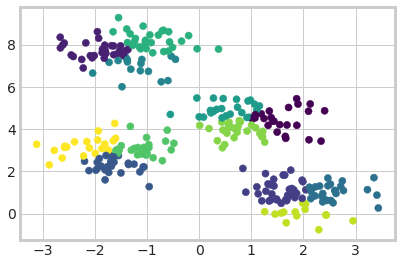

In [ ]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

labels = KMeans(12, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');